##Regresion Lineal Para predecir los gastos medicos

utilizaremos un dataset de kaggle

lo primero que hacemos es descargar una libreria llamada regressors que ayudara hacer un analisis mas profundo sobre la regresion lineal


In [1]:
!pip install setuptools==58
#!pip install regressors


In [2]:
!pip install regressors


In [ ]:
!pip install requests
import requests
response = requests.get("https://www.google.com")
print(response.status_code)

#Si el código anterior muestra un código de estado 200, significa que la conexión a Internet es exitosa.

200


In [3]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", context="notebook")  #damos estilo y contexto a los graficos

##Descargando los datos

Descarguemos los datos y veamos como se ven

In [4]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Analizando los datos

Se empezara viendo como se distribuyen los datos de la variable a predecir

(1338, 7)


<Axes: >

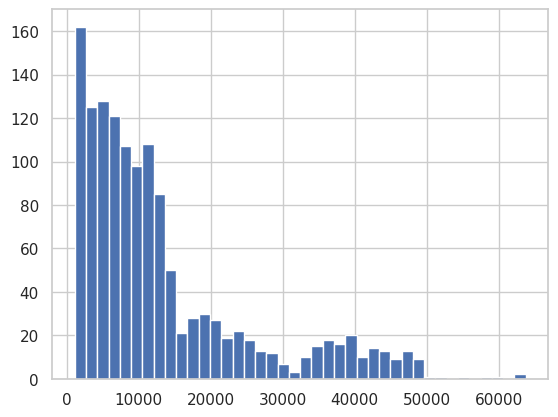

In [5]:
print(df.shape) # veo cuantas filas y columnas tiene mi df
df.charges.hist(bins=40)

##Outliers: Valores atipicos
En el contexto de un dataframe, los outliers son valores atípicos o excepcionales que difieren significativamente del resto de los datos. Estos valores extremos pueden ser muy altos o muy bajos en comparación con el resto de los datos y pueden distorsionar el análisis estadístico o los modelos que se construyan sobre los datos.



Codigo que analiza valores atipicos a partir de calculos de cuartiles(medidas de tenencia no central)

In [ ]:
def detect_outliers(x):
    Q3 = df[x].quantile(0.75)
    Q1 = df[x].quantile(0.25)
    IQR = Q3 - Q1 #Rango intercuartilico
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = df[df[x] > superior].index
    out_inf = df[df[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
    for j in out_inf:
        outliers.append(j)

    size = len(outliers)

    return f'Hay {size} valores atípicos en la variable {x}, y corresponden a los índices: {outliers}'

detect_outliers('charges')

'Hay 139 valores atípicos en la variable charges, y corresponden a los índices: [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]'

Determinacion de outlier por medio de grafico de Boxplot ( grafico de cajas y bigote)

https://www.youtube.com/watch?v=jd7yhWmQfQM&list=LL&index=7

<Axes: title={'center': 'Box plot for charges'}>

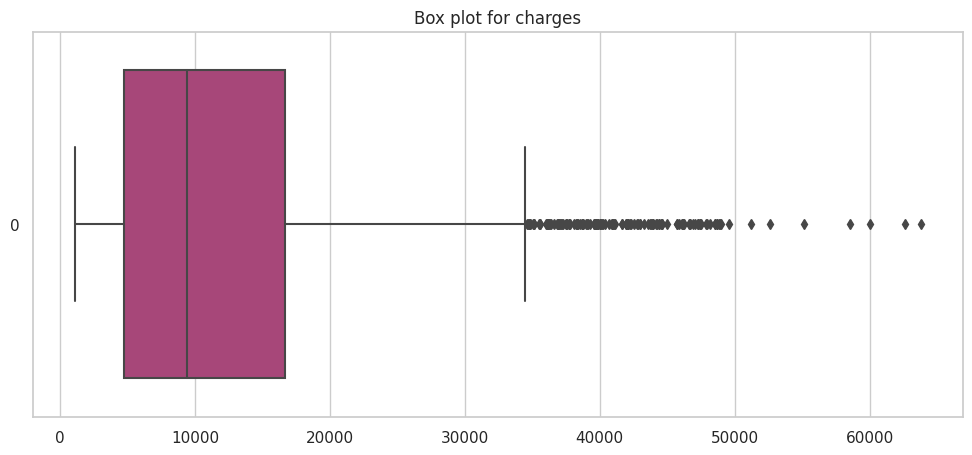

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(df["charges"], orient="h", palette = 'magma')

##Volviendo al histiograma
Algo a analizar, segun  este grafico, es entender que esta pasando con los datos arriba de los 50000, hay muy pocos datos en ese rango

In [6]:
df[df.charges>50000]


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [7]:
df = df[df.charges<50000] #eliminamos estos datos anolamos o outliers

In [8]:
df[df.charges>50000]

,age,sex,bmi,children,smoker,region,charges


##Viendo Correlaciones

Ahora entendamos nuestros datos, viendo como se distribuyen y correlacionan

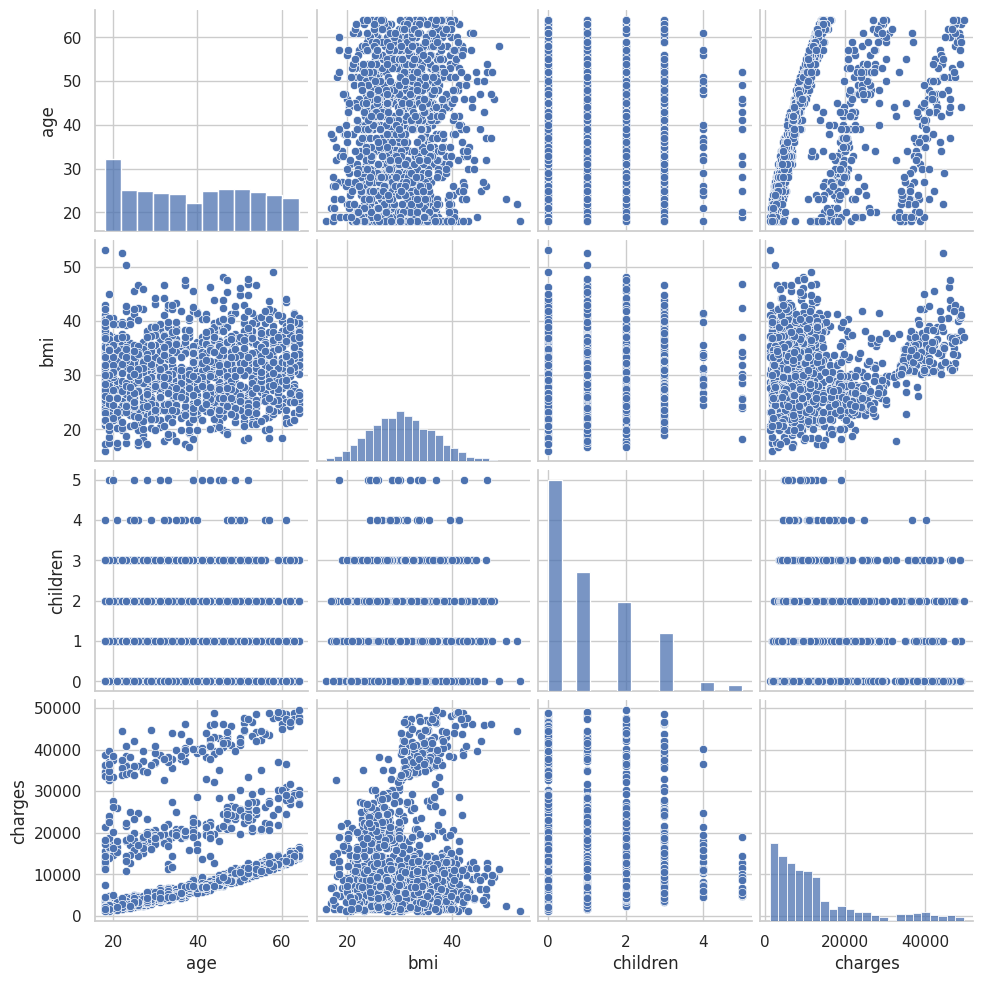

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(df, height=2.5)
plt.show()

<Axes: >

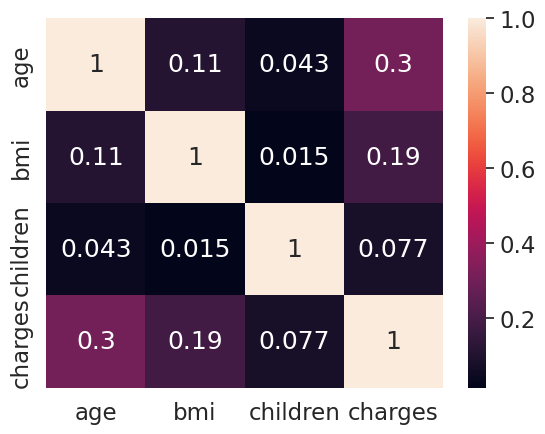

In [10]:
import numpy as np
numeric_cols = ["age", "bmi", "children", "charges"]
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

##Utilizando las variables no Numericas

Los conjuntos de datos tienen características tanto numéricas como categóricas. Las características categóricas se refieren a tipos de datos de cadena y los seres humanos pueden entenderlas fácilmente. Sin embargo, las máquinas no pueden interpretar los datos categóricos directamente. Por lo tanto, los datos categóricos deben convertirse en datos numéricos para su posterior procesamiento.

https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/

Las demas variables son variables categoricas, sexo, fumador,region. Para poder utilizarlas utilizaremos la funcion get_ pandas


Primero podemos ver con unas lineas de codigo cules varibles son numericas y cuales categoricas

In [10]:
cols_numericas = [colname for colname in df.columns if df[colname].dtype in ['int64', 'float64']]

cols_categoricas = [colname for colname in df.columns if df[colname].dtype in ['object']]

In [11]:
cols_categoricas

['sex', 'smoker', 'region']

In [12]:
cols_numericas

['age', 'bmi', 'children', 'charges']

In [11]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"],drop_first=True) # drop_first=True elimina columnas redundantes
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

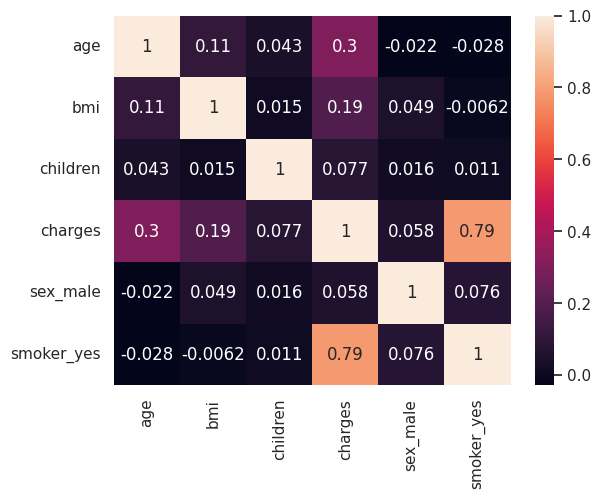

In [12]:

cols = ["age", "bmi", "children", "charges", "sex_male","smoker_yes"]
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
sns.heatmap(cm,annot=True, yticklabels=cols, xticklabels=cols)

##Creando Modelos

Primero se usara un modelo con todas las variables

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:


# Selecciona las columnas predictoras (X_cols) y la columna objetivo (y_cols)
X_cols = list(set(df.columns) - set(["charges"]))
y_cols = ["charges"]

# Obtiene los valores de las columnas predictoras (X) y la columna objetivo (y) del dataframe
X = df[X_cols].values
y = df[y_cols].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandariza los datos de las columnas predictoras y la columna objetivo utilizando StandardScaler
#El objeto StandardScaler se crea mediante StandardScaler(), y luego se ajusta a los datos de entrada
#y de salida utilizando el método fit(). Al ajustar el StandardScaler a los datos, se calculan y almacenan las medias y desviaciones estándar necesarias
#para la estandarización.
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Crea un modelo de regresión lineal y lo entrena utilizando los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)

y_pred.shape

(333, 1)

"Generalmente no se recomienda estandarizar la variable de respuesta (y) usando StandardScaler, ya que esto puede afectar la interpretación del resultado del modelo. En su lugar, podría ser más apropiado estandarizar los predictores (x).

El código divide los datos en conjuntos de entrenamiento y prueba usando train_test_split, pero luego aplica la estandarización a todo el conjunto de datos en lugar de solo al conjunto de entrenamiento. Esto significa que el conjunto de pruebas se está transformando utilizando estadísticas calculadas a partir de todo el conjunto de datos, lo que podría introducir sesgos.

Sería mejor ajustar la transformación de estandarización al conjunto de entrenamiento y luego aplicarla tanto al conjunto de entrenamiento como al de prueba."

In [16]:
# Selecciona las columnas predictoras (X_cols) y la columna objetivo (y_cols)
X_cols = list(set(df.columns) - set(["charges"]))
y_cols = ["charges"]

# Obtiene los valores de las columnas predictoras (X) y la columna objetivo (y) del dataframe
X = df[X_cols].values
y = df[y_cols].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandariza los datos de las columnas predictoras utilizando StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Crea un modelo de regresión lineal y lo entrena utilizando los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)

y_pred.shape


(335, 1)

##Funciones de Metricas
El siguiente Punto es crear las funciones para obtener la metricas del modelo



In [14]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print("r2",r2.round(4))
print("mse: ", mse.round(4))

r2 0.7402
mse:  0.2751


In [15]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)


In [16]:


# Asegúrate de que y_test tenga la forma adecuada
y_test = y_test.reshape(-1)
print("=============Summary=============")
stats.summary(model, X_test, y_test, X_cols)


=============Summary=============
Residuals:
    Min      1Q  Median     3Q   Max
-2.1023 -0.1236  0.0968 0.2411 0.945


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.005600    0.028974  -0.1933  0.846874
children          0.053187    0.029964   1.7750  0.076815
region_northwest -0.024338    0.032589  -0.7468  0.455708
bmi               0.164662    0.030629   5.3761  0.000000
age               0.289931    0.029199   9.9294  0.000000
sex_male         -0.017618    0.028808  -0.6116  0.541244
region_southeast -0.032137    0.035539  -0.9043  0.366504
smoker_yes        0.797712    0.029394  27.1388  0.000000
region_southwest -0.042401    0.032933  -1.2875  0.198824
---
R-squared:  0.74021,    Adjusted R-squared:  0.73379
F-statistic: 115.39 on 8 features


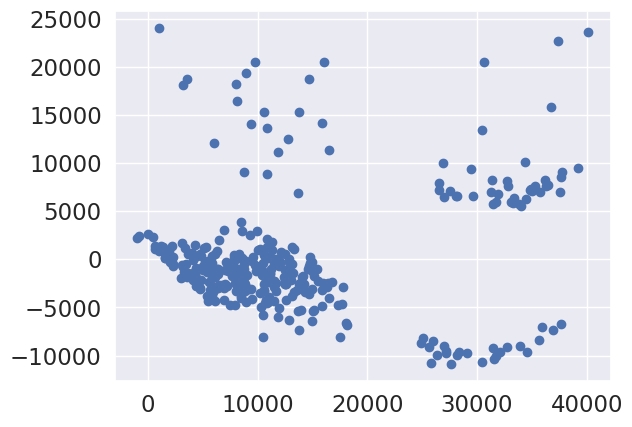

In [20]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

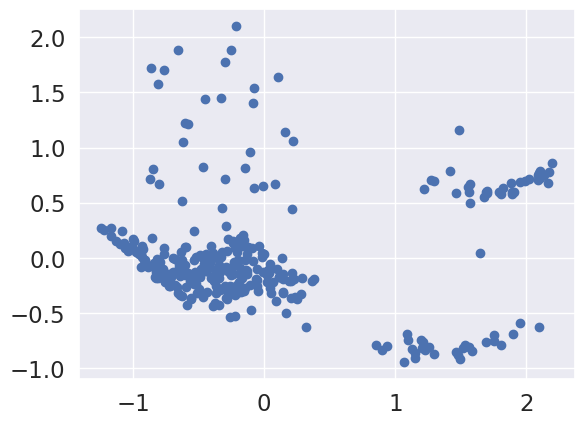

In [17]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

En esta grafaica de residuales vemos que cundo los valores de y_pred estan en el intervalo (-1,1), aclarar q son valores estandarizados, tenemos que la mayoria de los valores reales estan concentrados alrededor de la linea 0 que es donde estan los valores predichos. a medidda que el vlor de la prediccion tenemos que esta ya no es tan exacta ya que los puntos estan mas dispersos

##Segundo modelo

Estos resultados de arriba son buenos, pero se pueden mejorar. Se intentara hacer algunas transformaciones sobre las variables que pueden ser de utilidad


In [32]:
df_second = df.copy()
df_second["age2"] = df_second.age**2
df_second["sobrepeso"] = (df_second.bmi >= 30).astype(int) # si una persona tiene un bmi >= 30 tiene sobrepeso. Con astype hacemos que el resultado no sea booleano verdadero o falso sino 1 o 0
df_second["sobrepeso+fumador"] = df_second.sobrepeso * df_second.smoker_yes

Ahora, con estas nuevas varibles, creamos el model siguiendo los pasos anteriores

In [33]:
# Selecciona las columnas predictoras (X_cols) y la columna objetivo (y_cols)
X_cols = list(set(df_second.columns) - set(["charges"]))
y_cols = ["charges"]

# Obtiene los valores de las columnas predictoras (X) y la columna objetivo (y) del dataframe
X = df_second[X_cols].values
y = df_second[y_cols].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandariza los datos de las columnas predictoras y la columna objetivo utilizando StandardScaler
#El objeto StandardScaler se crea mediante StandardScaler(), y luego se ajusta a los datos de entrada
#y de salida utilizando el método fit(). Al ajustar el StandardScaler a los datos, se calculan y almacenan las medias y desviaciones estándar necesarias
#para la estandarización.
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Crea un modelo de regresión lineal y lo entrena utilizando los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)

In [34]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print("r2 :",r2.round(4))
print("mse: ", mse.round(4))


r2 : 0.8514
mse:  0.1334


In [35]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [50]:

y_test = y_test.reshape(-1)
print("=============Summary=============")
stats.summary(model, X_test, y_test, X_cols)

=============Summary=============
Residuals:
    Min     1Q  Median     3Q    Max
-2.0268 0.0118  0.1012 0.1568 0.3144


Coefficients:
                   Estimate  Std. Error  t value  p value
_intercept         0.000000    0.023206   0.0000      1.0
age2               0.313719    0.022167  14.1527      0.0
sobrepeso+fumador  0.485831    0.029834  16.2845      0.0
smoker_yes         0.467410    0.030619  15.2654      0.0
---
R-squared:  0.83307,    Adjusted R-squared:  0.83155
F-statistic: 547.30 on 3 features


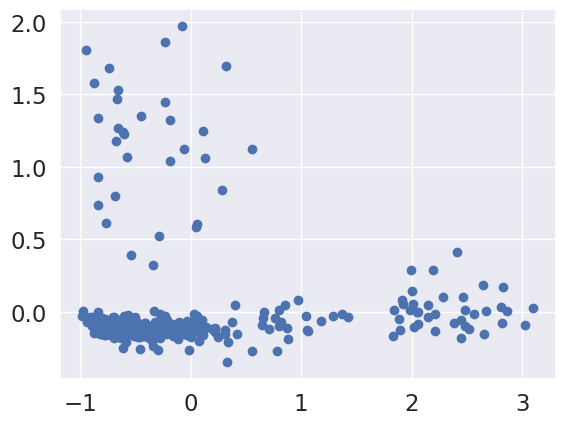

In [28]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

Notemos como meejora el grafico de residual, porlo tanto el modelo, creando las varibles age2 y sobrepeso+fumador ya que son junto a smoker_yes a las que el model les asigna mas peso

##Analizamos de que variables puedo presindir

 El "p value" es el valor p correspondiente, que indica la probabilidad de obtener un valor del coeficiente igual o más extremo que el observado si la hipótesis nula (el coeficiente igual a cero) fuera cierta. Si el valor p es menor que un nivel de significancia elegido (por ejemplo, 0.05), se considera que el coeficiente es estadísticamente significativo.


In [39]:
# Selecciona las columnas predictoras (X_cols) y la columna objetivo (y_cols)
X_cols = ["region_southwest","age2", "sobrepeso+fumador","smoker_yes","children"]
y_cols = ["charges"]

# Obtiene los valores de las columnas predictoras (X) y la columna objetivo (y) del dataframe
X = df_second[X_cols].values
y = df_second[y_cols].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandariza los datos de las columnas predictoras y la columna objetivo utilizando StandardScaler
#El objeto StandardScaler se crea mediante StandardScaler(), y luego se ajusta a los datos de entrada
#y de salida utilizando el método fit(). Al ajustar el StandardScaler a los datos, se calculan y almacenan las medias y desviaciones estándar necesarias
#para la estandarización.
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Crea un modelo de regresión lineal y lo entrena utilizando los datos de entrenamiento
model = LinearRegression()   # fit_intercept=False elimina interceptor en el modelo
model.fit(X_train, y_train)

# Realiza predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)

In [40]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print("r2 :",r2.round(4))
print("mse: ", mse.round(4))

r2 : 0.8847
mse:  0.1237


In [41]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [42]:
y_test = y_test.reshape(-1)
print("=============Summary=============")
stats.summary(model, X_test, y_test, X_cols)

=============Summary=============
Residuals:
    Min     1Q  Median    3Q    Max
-1.9516 0.0794  0.1214 0.153 1.5184


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.009111    0.019406   0.4695  0.639013
region_southwest  -0.031258    0.020578  -1.5190  0.129723
age2               0.316124    0.020027  15.7848  0.000000
sobrepeso+fumador  0.502894    0.023244  21.6356  0.000000
smoker_yes         0.455741    0.023987  18.9999  0.000000
children           0.059233    0.018910   3.1323  0.001889
---
R-squared:  0.88471,    Adjusted R-squared:  0.88295
F-statistic: 501.89 on 5 features


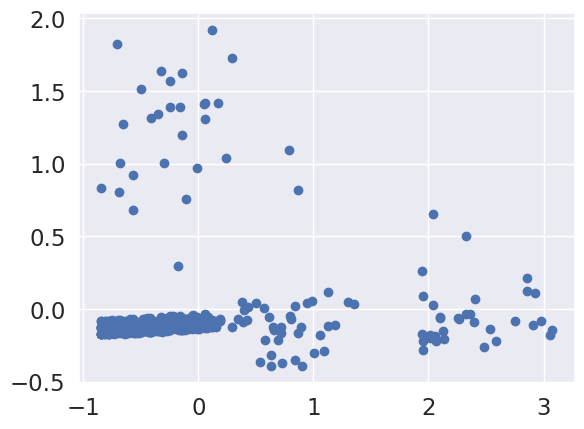

In [54]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

Ahora vemos que con los nuevos valores de p_value podriamos prresindir de la variable southwest

In [51]:
# Selecciona las columnas predictoras (X_cols) y la columna objetivo (y_cols)
X_cols = ["age2", "sobrepeso+fumador","smoker_yes","children"]
y_cols = ["charges"]

# Obtiene los valores de las columnas predictoras (X) y la columna objetivo (y) del dataframe
X = df_second[X_cols].values
y = df_second[y_cols].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandariza los datos de las columnas predictoras y la columna objetivo utilizando StandardScaler
#El objeto StandardScaler se crea mediante StandardScaler(), y luego se ajusta a los datos de entrada
#y de salida utilizando el método fit(). Al ajustar el StandardScaler a los datos, se calculan y almacenan las medias y desviaciones estándar necesarias
#para la estandarización.
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Crea un modelo de regresión lineal y lo entrena utilizando los datos de entrenamiento
model = LinearRegression(fit_intercept=False)   # fit_intercept=False elimina interceptor en el modelo
model.fit(X_train, y_train)

# Realiza predicciones utilizando los datos de prueba
y_pred = model.predict(X_test)


mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print("r2 :",r2.round(4))
print("mse: ", mse.round(4))



r2 : 0.8371
mse:  0.1604


In [53]:
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)
print("=============Summary=============")
stats.summary(model, X_test, y_test, X_cols)


=============Summary=============
Residuals:
    Min     1Q  Median    3Q    Max
-1.9192 0.0726   0.107 0.141 0.3929


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.022009   0.0000  1.000000
age2               0.308128    0.022057  13.9694  0.000000
sobrepeso+fumador  0.493345    0.027417  17.9943  0.000000
smoker_yes         0.467445    0.026128  17.8909  0.000000
children           0.060982    0.021653   2.8164  0.005148
---
R-squared:  0.83714,    Adjusted R-squared:  0.83515
F-statistic: 421.49 on 4 features


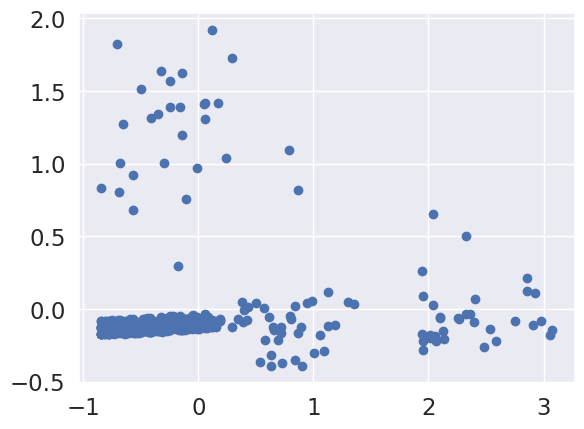

In [55]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

##conclusionyor

Elijo el modelo de mayor R2